#  Carolyn Randall - Data Science project
### Student Grades Datasets


## Summary

In [7]:
#  import libraries
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas_profiling


# this allows plots to appear directly in the notebook
%matplotlib inline


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [8]:
# Read the data sets into Dataframes
# Data source are csv files downloaded from Kaggle.  
# Let's read the student maths data set into a Dataframe called 'studentmath
studentmath = pd.read_csv('student-mat.csv')  
# read the student portuguese data into a Dataframe called 'studentport'
studentport = pd.read_csv('student-por.csv')  

## Explore the data

### Definitions of the data and what the values mean
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2.	sex - student's sex (binary: 'F' - female or 'M' - male)

3.	age - student's age (numeric: from 15 to 22)

4.	address - student's home address type (binary: 'U' - urban or 'R' - rural)

5.	famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6.	Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7.	Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade) 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8.	Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9.	Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10.	Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services'(e.g. administrative or police), 'at_home' or 'other')
11.	reason - reason to choose this school (nominal: close to 'home', school 'reputation','course' preference or 'other')
12.	guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13.	traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min. 3 - 30 min. to 1 hour, or 4 - >1 hour)
14.	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15.	failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16.	schoolsup - extra educational support (binary: yes or no)
17.	famsup - family educational support (binary: yes or no)
18.	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.	activities - extra-curricular activities (binary: yes or no)
20.	nursery - attended nursery school (binary: yes or no)
21.	higher - wants to take higher education (binary: yes or no)
22.	internet - Internet access at home (binary: yes or no)
23.	romantic - with a romantic relationship (binary: yes or no)
24.	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25.	freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26.	goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27.	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28.	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29.	health - current health status (numeric: from 1 - very bad to 5 - very good)	30.	absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
	1.	G1 - first period grade (numeric: from 0 to 20)
	2.	G2 - second period grade (numeric: from 0 to 20)
	3.	G3 - final grade (numeric: from 0 to 20, output target)


In [9]:
pandas_profiling.ProfileReport(studentmath)

Number of variables,33
Number of observations,395
Total Missing (%),0.0%
Total size in memory,101.9 KiB
Average record size in memory,264.2 B
Numeric,15
Categorical,17
Date,0
Text (Unique),0
Rejected,1
Distinct count,5


In [10]:
pandas_profiling.ProfileReport(studentport)

Number of variables,33
Number of observations,649
Total Missing (%),0.0%
Total size in memory,167.4 KiB
Average record size in memory,264.1 B
Numeric,15
Categorical,17
Date,0
Text (Unique),0
Rejected,1
Distinct count,5


In [11]:
# found these functions on kaggle so using them they look useful to see data types and values
def get_feature_lists_by_dtype(data):
    features = data.columns.tolist()
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

def show_uniques(data,features):
    for f in features:
        if len(data[f].unique()) < 30:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()))
        else:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()[0:10]))
def show_all_uniques(data):
    dtypes = get_feature_lists_by_dtype(data)
    for key in dtypes.keys():
        print(key + "\n")
        show_uniques(data,dtypes[key])
        print()

In [12]:
show_all_uniques(studentmath)

object

school: count(2) ['GP' 'MS']
sex: count(2) ['F' 'M']
address: count(2) ['U' 'R']
famsize: count(2) ['GT3' 'LE3']
Pstatus: count(2) ['A' 'T']
Mjob: count(5) ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: count(5) ['teacher' 'other' 'services' 'health' 'at_home']
reason: count(4) ['course' 'other' 'home' 'reputation']
guardian: count(3) ['mother' 'father' 'other']
schoolsup: count(2) ['yes' 'no']
famsup: count(2) ['no' 'yes']
paid: count(2) ['no' 'yes']
activities: count(2) ['no' 'yes']
nursery: count(2) ['yes' 'no']
higher: count(2) ['yes' 'no']
internet: count(2) ['no' 'yes']
romantic: count(2) ['no' 'yes']

int64

age: count(8) [18 17 15 16 19 22 20 21]
Medu: count(5) [4 1 3 2 0]
Fedu: count(5) [4 1 2 3 0]
traveltime: count(4) [2 1 3 4]
studytime: count(4) [2 3 1 4]
failures: count(4) [0 3 2 1]
famrel: count(5) [4 5 3 1 2]
freetime: count(5) [3 2 4 1 5]
goout: count(5) [4 3 2 1 5]
Dalc: count(5) [1 2 5 3 4]
Walc: count(5) [1 3 2 4 5]
health: count(5) [3 5 1 2 4]
absen

In [13]:
show_all_uniques(studentport)

object

school: count(2) ['GP' 'MS']
sex: count(2) ['F' 'M']
address: count(2) ['U' 'R']
famsize: count(2) ['GT3' 'LE3']
Pstatus: count(2) ['A' 'T']
Mjob: count(5) ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: count(5) ['teacher' 'other' 'services' 'health' 'at_home']
reason: count(4) ['course' 'other' 'home' 'reputation']
guardian: count(3) ['mother' 'father' 'other']
schoolsup: count(2) ['yes' 'no']
famsup: count(2) ['no' 'yes']
paid: count(2) ['no' 'yes']
activities: count(2) ['no' 'yes']
nursery: count(2) ['yes' 'no']
higher: count(2) ['yes' 'no']
internet: count(2) ['no' 'yes']
romantic: count(2) ['no' 'yes']

int64

age: count(8) [18 17 15 16 19 22 20 21]
Medu: count(5) [4 1 3 2 0]
Fedu: count(5) [4 1 2 3 0]
traveltime: count(4) [2 1 3 4]
studytime: count(4) [2 3 1 4]
failures: count(4) [0 3 1 2]
famrel: count(5) [4 5 3 1 2]
freetime: count(5) [3 2 4 1 5]
goout: count(5) [4 3 2 1 5]
Dalc: count(5) [1 2 5 3 4]
Walc: count(5) [1 3 2 4 5]
health: count(5) [3 5 1 2 4]
absen

In [14]:
# G1 and G2 are highly correlated to G3 (as G3 is the final grade)
#  I am going to use the average of the three grades in my modeling
# G1, G2 and G3 are integers so convert Average to an integer also
studentmath['Average'] = ((studentmath.G1 + studentmath.G2 + studentmath.G3)/3)
studentmath['roundedAvg'] = round(studentmath.Average, 0)

In [15]:
#now drop the original three and keep the average
studentmath = studentmath.drop('G1',axis=1)
studentmath = studentmath.drop('G2',axis=1)
studentmath = studentmath.drop('G3',axis=1)

In [16]:
#studentmath['roundedAvg'] = round(studentmath.Average, 0)
show_all_uniques(studentmath)

object

school: count(2) ['GP' 'MS']
sex: count(2) ['F' 'M']
address: count(2) ['U' 'R']
famsize: count(2) ['GT3' 'LE3']
Pstatus: count(2) ['A' 'T']
Mjob: count(5) ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: count(5) ['teacher' 'other' 'services' 'health' 'at_home']
reason: count(4) ['course' 'other' 'home' 'reputation']
guardian: count(3) ['mother' 'father' 'other']
schoolsup: count(2) ['yes' 'no']
famsup: count(2) ['no' 'yes']
paid: count(2) ['no' 'yes']
activities: count(2) ['no' 'yes']
nursery: count(2) ['yes' 'no']
higher: count(2) ['yes' 'no']
internet: count(2) ['no' 'yes']
romantic: count(2) ['no' 'yes']

int64

age: count(8) [18 17 15 16 19 22 20 21]
Medu: count(5) [4 1 3 2 0]
Fedu: count(5) [4 1 2 3 0]
traveltime: count(4) [2 1 3 4]
studytime: count(4) [2 3 1 4]
failures: count(4) [0 3 2 1]
famrel: count(5) [4 5 3 1 2]
freetime: count(5) [3 2 4 1 5]
goout: count(5) [4 3 2 1 5]
Dalc: count(5) [1 2 5 3 4]
Walc: count(5) [1 3 2 4 5]
health: count(5) [3 5 1 2 4]
absen

In [17]:
# G1 and G2 are highly correlated to G3 (as G3 is the final grade)
#  I am going to use the average of the three grades in my modeling
studentport['Average'] = ((studentport.G1 + studentport.G2 + studentport.G3)/3)
studentport['roundedAvg'] = round(studentport.Average, 0)

In [18]:
#now drop the original three and keep the average
studentport = studentport.drop('G1',axis=1)
studentport = studentport.drop('G2',axis=1)
studentport = studentport.drop('G3',axis=1)

## I would like to look at the categorical data and will use dummies to convert to numeric values

In [19]:
# first convert xxxxx non numerics to take a look at which we might like to use as features
#studentmath_with_dummies = pd.get_dummies(data=studentmath, columns = ['sex', 'Mjob', 'Fjob','Medu', 'Fedu','school','internet', 'higher', 'Pstatus', 'romantic','famsize','paid','activities', 'nursery','address','reason','guardian'], prefix = ['sex', 'Mjob', 'Fjob','Medu','Fedu','school','internet', 'higher', 'Pstatus', 'romantic','famsize','paid', 'activities', 'nursery','address','reason','guardian'] )
studentmath_with_dummies = pd.get_dummies(data=studentmath, columns = ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob', 'Fjob','reason', 'guardian','schoolsup','famsup', 'paid','activities', 'nursery','higher','internet', 'romantic'], prefix = ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob', 'Fjob','reason', 'guardian','schoolsup','famsup', 'paid','activities', 'nursery','higher','internet', 'romantic'] )

# one version with Rounded and one with float average
math_d_A = studentmath_with_dummies.drop('roundedAvg', 1)
math_d_R = studentmath_with_dummies.drop('Average', 1)


In [20]:
studentmath_with_dummies.head()
studentmath_with_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Average',
       'roundedAvg', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [21]:
# drop the rem

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,0.103063,-0.103063,0.086632,-0.086632,0.209081,-0.209081,0.112094,-0.112094,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,-0.108277,0.108277,-0.193263,0.193263,-0.168845,0.168845,-0.201463,0.201463,-0.039681,0.039681
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.112643,0.112643,-0.157177,0.157177,-0.174566,0.174566,-0.127507,0.127507,-0.015602,0.015602
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,0.007766,-0.007766,0.033338,-0.033338,0.083508,-0.083508,0.111302,-0.111302,-0.021962,0.021962
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,-0.089877,0.089877,-0.081325,0.081325,-0.175081,0.175081,-0.059422,0.059422,-0.053285,0.053285
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,0.069341,-0.069341,0.100734,-0.100734,0.300316,-0.300316,0.063451,-0.063451,-0.093137,0.093137
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,-0.040687,0.040687,0.003581,-0.003581,-0.024319,0.024319,-0.032768,0.032768,0.063816,-0.063816
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,-0.089728,0.089728,0.024696,-0.024696,0.061244,-0.061244,-0.051286,0.051286,0.011182,-0.011182
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,-0.046088,0.046088,-0.004612,0.004612,0.039700,-0.039700,-0.074370,0.074370,-0.007870,0.007870
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,0.066508,-0.066508,0.084849,-0.084849,0.069828,-0.069828,-0.036210,0.036210,-0.015121,0.015121


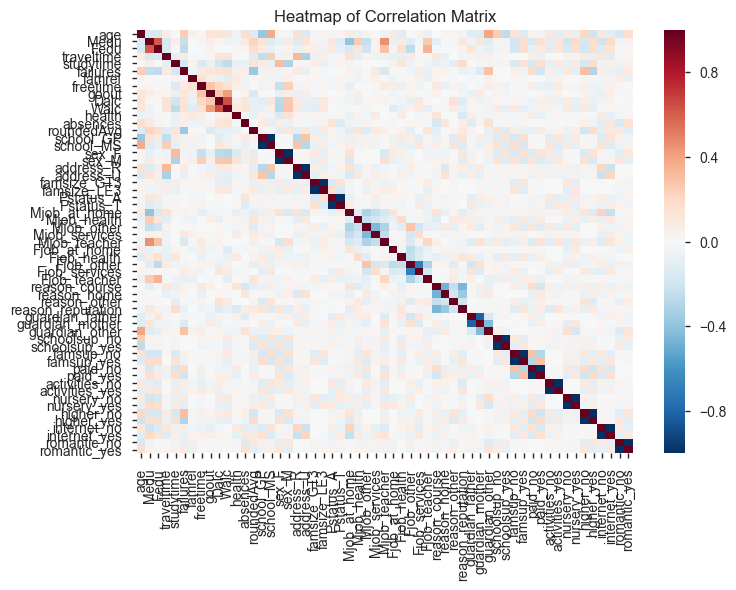

In [22]:
# do a correlation summary and see 
#Plot a Correlation Matrix
corr = math_d_R.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

In [23]:
#Extract ''Average'' column, because 'Average' is our target value
corr_left = pd.DataFrame(corr['roundedAvg'].drop('roundedAvg'))
corr_left.sort_values(by = 'roundedAvg', ascending = False)

,roundedAvg
Medu,0.219673
higher_yes,0.184069
Fedu,0.172374
schoolsup_no,0.137593
studytime,0.132332
Mjob_health,0.125222
Fjob_teacher,0.122388
address_U,0.105061
romantic_no,0.104345
sex_M,0.104336


### Try some models

In [24]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
from sklearn import metrics

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
#Train-Test split
from sklearn.model_selection import train_test_split
#data = math_w_R.drop('Average', 1)
#data = math_d_R.drop('roundedAvg', 1)
label = math_d_A('Average')
data = math_w_A.drop('roundedAvg', 1)
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

TypeError: 'DataFrame' object is not callable

In [26]:
# Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

NameError: name 'data_train' is not defined

In [27]:
# check if there is a command to convert all the non binary to dummies in one go

In [28]:
from io import StringIO
from sklearn.tree import export_graphviz

out = StringIO()
tree.export_graphviz(dt, out_file = out)
# OUTPUT DOT LANGUAGE SCRIPTS
print(out.getvalue())

AttributeError: 'NoneType' object has no attribute 'children_left'

In [6]:
# Create a feature vector
from sklearn import metrics
features = math_d_R.columns.tolist()

from sklearn.tree import export_graphviz
tree.export_graphviz(dt, out_file='tree_hr_analysis.dot', feature_names=features)

NameError: name 'math_d_R' is not defined

Visualising the tree is a bit of a hassle...
You can try copying and pasting the tree from the dot output into a tool like, (webgraphviz)[http://www.webgraphviz.com/].
What is the first thing you notice?

In [91]:
data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [92]:
#massive tree produced 

In [93]:
# Let's try running this with not as much depth
# Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

# Create a feature vector
features = math_d_R.columns.tolist()

from sklearn.tree import export_graphviz
tree.export_graphviz(dt, out_file='tree_hr_analysis_smaller_tree.dot', feature_names=features)

Training score:  0.186708860759
Testing score:  0.0253164556962


In [94]:
out = StringIO()
tree.export_graphviz(dt, out_file = out)
# OUTPUT DOT LANGUAGE SCRIPTS
print(out.getvalue())

digraph Tree {
node [shape=box] ;
0 [label="X[12] <= 0.5\ngini = 0.9205\nsamples = 316\nvalue = [7, 3, 13, 8, 11, 15, 24, 39, 31, 33, 36, 27, 22\n21, 10, 6, 8, 2]"] ;
1 [label="X[5] <= 0.5\ngini = 0.9246\nsamples = 92\nvalue = [7, 3, 13, 4, 5, 4, 4, 7, 5, 6, 2, 9, 10, 5\n2, 3, 2, 1]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.924\nsamples = 67\nvalue = [4, 3, 2, 2, 3, 1, 4, 5, 5, 6, 2, 7, 10, 5\n2, 3, 2, 1]"] ;
1 -> 2 ;
3 [label="gini = 0.752\nsamples = 25\nvalue = [3, 0, 11, 2, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0\n0, 0, 0, 0]"] ;
1 -> 3 ;
4 [label="X[5] <= 2.5\ngini = 0.9005\nsamples = 224\nvalue = [0, 0, 0, 4, 6, 11, 20, 32, 26, 27, 34, 18, 12\n16, 8, 3, 6, 1]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.8988\nsamples = 218\nvalue = [0, 0, 0, 4, 6, 9, 16, 32, 26, 27, 34, 18, 12\n16, 8, 3, 6, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.4444\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]"] 

In [95]:
# x[12] top then x[5] so I think that is absences then failures

In [96]:
# maybe 5 depth try
dt = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

# Create a feature vector
features = math_d_R.columns.tolist()

from sklearn.tree import export_graphviz
tree.export_graphviz(dt, out_file='tree_hr_analysis_smaller_tree.dot', feature_names=features)

Training score:  0.354430379747
Testing score:  0.0126582278481


In [97]:
out = StringIO()
tree.export_graphviz(dt, out_file = out)
# OUTPUT DOT LANGUAGE SCRIPTS
print(out.getvalue())

digraph Tree {
node [shape=box] ;
0 [label="X[12] <= 0.5\ngini = 0.9205\nsamples = 316\nvalue = [7, 3, 13, 8, 11, 15, 24, 39, 31, 33, 36, 27, 22\n21, 10, 6, 8, 2]"] ;
1 [label="X[5] <= 0.5\ngini = 0.9246\nsamples = 92\nvalue = [7, 3, 13, 4, 5, 4, 4, 7, 5, 6, 2, 9, 10, 5\n2, 3, 2, 1]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[33] <= 0.5\ngini = 0.924\nsamples = 67\nvalue = [4, 3, 2, 2, 3, 1, 4, 5, 5, 6, 2, 7, 10, 5\n2, 3, 2, 1]"] ;
1 -> 2 ;
3 [label="X[31] <= 0.5\ngini = 0.8642\nsamples = 36\nvalue = [2, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 6, 10, 2\n0, 1, 1, 1]"] ;
2 -> 3 ;
4 [label="X[19] <= 0.5\ngini = 0.8316\nsamples = 28\nvalue = [1, 0, 0, 2, 1, 1, 0, 3, 0, 2, 1, 2, 10, 2\n0, 1, 1, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.8395\nsamples = 9\nvalue = [0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0\n0, 1, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.6925\nsamples = 19\nvalue = [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 10, 2\n0, 1, 0, 0]"] ;
4 -> 6 ;
7 [label="X[11] <= 4.5\ngini = 

In [106]:
# Take a  selection of the variables
d = math_d_R[['roundedAvg','absences', 'failures', 'goout', 'age', 'reason_home', 'reason_course', 'Fjob_services']]

In [107]:
# Explore the data to identify trends in characteristics of survivors
d.roundedAvg.value_counts()                    # average grades
d.roundedAvg.mean()                            # The average grade  for everyone
d.groupby('absences').roundedAvg.mean()             # By absences: 
d.groupby('failures').roundedAvg.mean()          # By failures
d.groupby(['goout', 'failures']).roundedAvg.mean() # By Sex and Pclass: Women in the 1st and 2nd classes had the highest survival rates

# Create a proxy variable representing whether the Spouse was on board
#d['Spouse'] = ((d.Age > 18) & (d.SibSp >= 1)).astype(int)
#d.Spouse.value_counts()
#d.groupby(['Pclass', 'Spouse']).Survived.mean() # Having a spouse appears to increase survival in the 1st class only

goout  failures
1      0           11.666667
       1            4.666667
       2           10.000000
       3            9.000000
2      0           12.071429
       1            9.500000
       2            6.500000
       3            6.666667
3      0           11.378378
       1            9.571429
       2            9.333333
       3            7.500000
4      0           10.725806
       1            8.722222
       2            7.500000
       3            5.000000
5      0           10.351351
       1            9.800000
       2            6.000000
       3            6.000000
Name: roundedAvg, dtype: float64

In [108]:
#Split into training and test datasets, and build the model

#label = d['roundedAvg']
label = d.roundedAvg
del d['roundedAvg']
d

,absences,failures,goout,age,reason_home,reason_course,Fjob_services
0,6,0,4,18,0,1,0
1,4,0,3,17,0,1,0
2,10,3,2,15,0,0,0
3,2,0,2,15,1,0,1
4,4,0,2,16,1,0,0
5,10,0,2,16,0,0,0
6,0,0,4,16,1,0,0
7,6,0,4,17,1,0,0
8,0,0,2,15,1,0,0
9,0,0,1,15,1,0,0


In [109]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(d,RoundedAvg-1, random_state=1)

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)


# Create a feature vector
features = d.columns.tolist()

features

['absences',
 'failures',
 'goout',
 'age',
 'reason_home',
 'reason_course',
 'Fjob_services']

In [110]:
X_train

,absences,failures,goout,age,reason_home,reason_course,Fjob_services
107,2,0,3,16,1,0,0
27,4,0,4,15,0,0,1
89,18,0,3,16,0,0,0
347,0,0,5,18,0,1,0
73,2,0,2,16,0,0,0
272,2,0,3,18,1,0,0
260,21,0,2,18,1,0,0
119,6,0,3,15,0,0,0
386,7,0,3,18,0,0,0
292,12,1,3,18,0,0,0


In [5]:
# 
# How to interpret the diagram?
ctree.classes_


NameError: name 'ctree' is not defined

In [4]:
# Predict what will happen for 
#features
#ctree.predict_proba([4, 0, 5, 17, 0, 1, 0])
ctree.predict([4, 0, 5, 17, 0, 1, 0])

NameError: name 'ctree' is not defined

### try random forests


In [117]:
# create a list of feature columns
feature_cols = ['absences', 'failures', 'goout', 'age', 'reason_home', 'reason_course', 'Fjob_services']

In [118]:
# import class, instantiate estimator, fit with all data
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfclf.fit(math_d_R[feature_cols], math_d_R.roundedAvg)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

hese are the most important tuning parameters for Random Forests:
n_estimators: more estimators (trees) increases performance but decreases speed
max_features: The number of features to consider when looking for the best split
Cross-validate to try different combinations of paramters and optimise for ideal values

In [119]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})

,feature,importance
0,absences,0.325262
1,failures,0.079030
2,goout,0.218841
3,age,0.208246
4,reason_home,0.050397
5,reason_course,0.047582
6,Fjob_services,0.070641


In [120]:
# compute the out-of-bag classification accuracy
rfclf.oob_score_

0.11898734177215189

In [121]:
# try less features
# create a list of feature columns
feature_cols = ['absences', 'failures', 'goout']

In [122]:
rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfclf.fit(math_d_R[feature_cols], math_d_R.roundedAvg)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [123]:
# compute the out-of-bag classification accuracy
rfclf.oob_score_

0.11645569620253164

In [126]:
# try less features
# create a list of feature columns
feature_cols = ['absences', 'failures', 'goout','Mjob_teacher']

In [129]:
rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfclf.fit(math_d_R[feature_cols], math_d_R.roundedAvg)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [130]:
# compute the out-of-bag classification accuracy
rfclf.oob_score_

0.096202531645569619

In [131]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})

,feature,importance
0,absences,0.559557
1,failures,0.108360
2,goout,0.271375
3,Mjob_teacher,0.060709
